In [69]:
#importing modules

import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
import pickle
from sklearn import model_selection
from scipy.stats import ttest_ind
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, roc_curve, precision_recall_curve, confusion_matrix


Part I: Exploratory Data Analysis (EDA)

Step 1: Load the dataset

In [70]:
data = pd.read_csv("C:\\Users\\iykeo\\ml-project-supervised-learning\\diabetes.csv")

Step 2: Explore the dataset
Exploring the basic information about the dataset, such as the number of rows and columns, data types, and missing values:

In [71]:
# number of rows and columns in the dataset
print("Shape of the dataset:", data.shape)

Shape of the dataset: (768, 9)


In [72]:
# data types of each column
print(data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [73]:
# data info and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [74]:
# statistical summary of the numerical columns
data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [75]:
# Display the first few rows of the data
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [76]:
# Check for missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Step 3: Data manipulation

In [77]:
# count the data in each category of outcome (Diabetic = 1, Non-diabetic = 0)
data.groupby('Outcome').count()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Outcome                                                                     
0                500      500            500            500      500  500   
1                268      268            268            268      268  268   

         DiabetesPedigreeFunction  Age  
Outcome                                 
0                             500  500  
1                             268  268

Step 4: Data Visualization

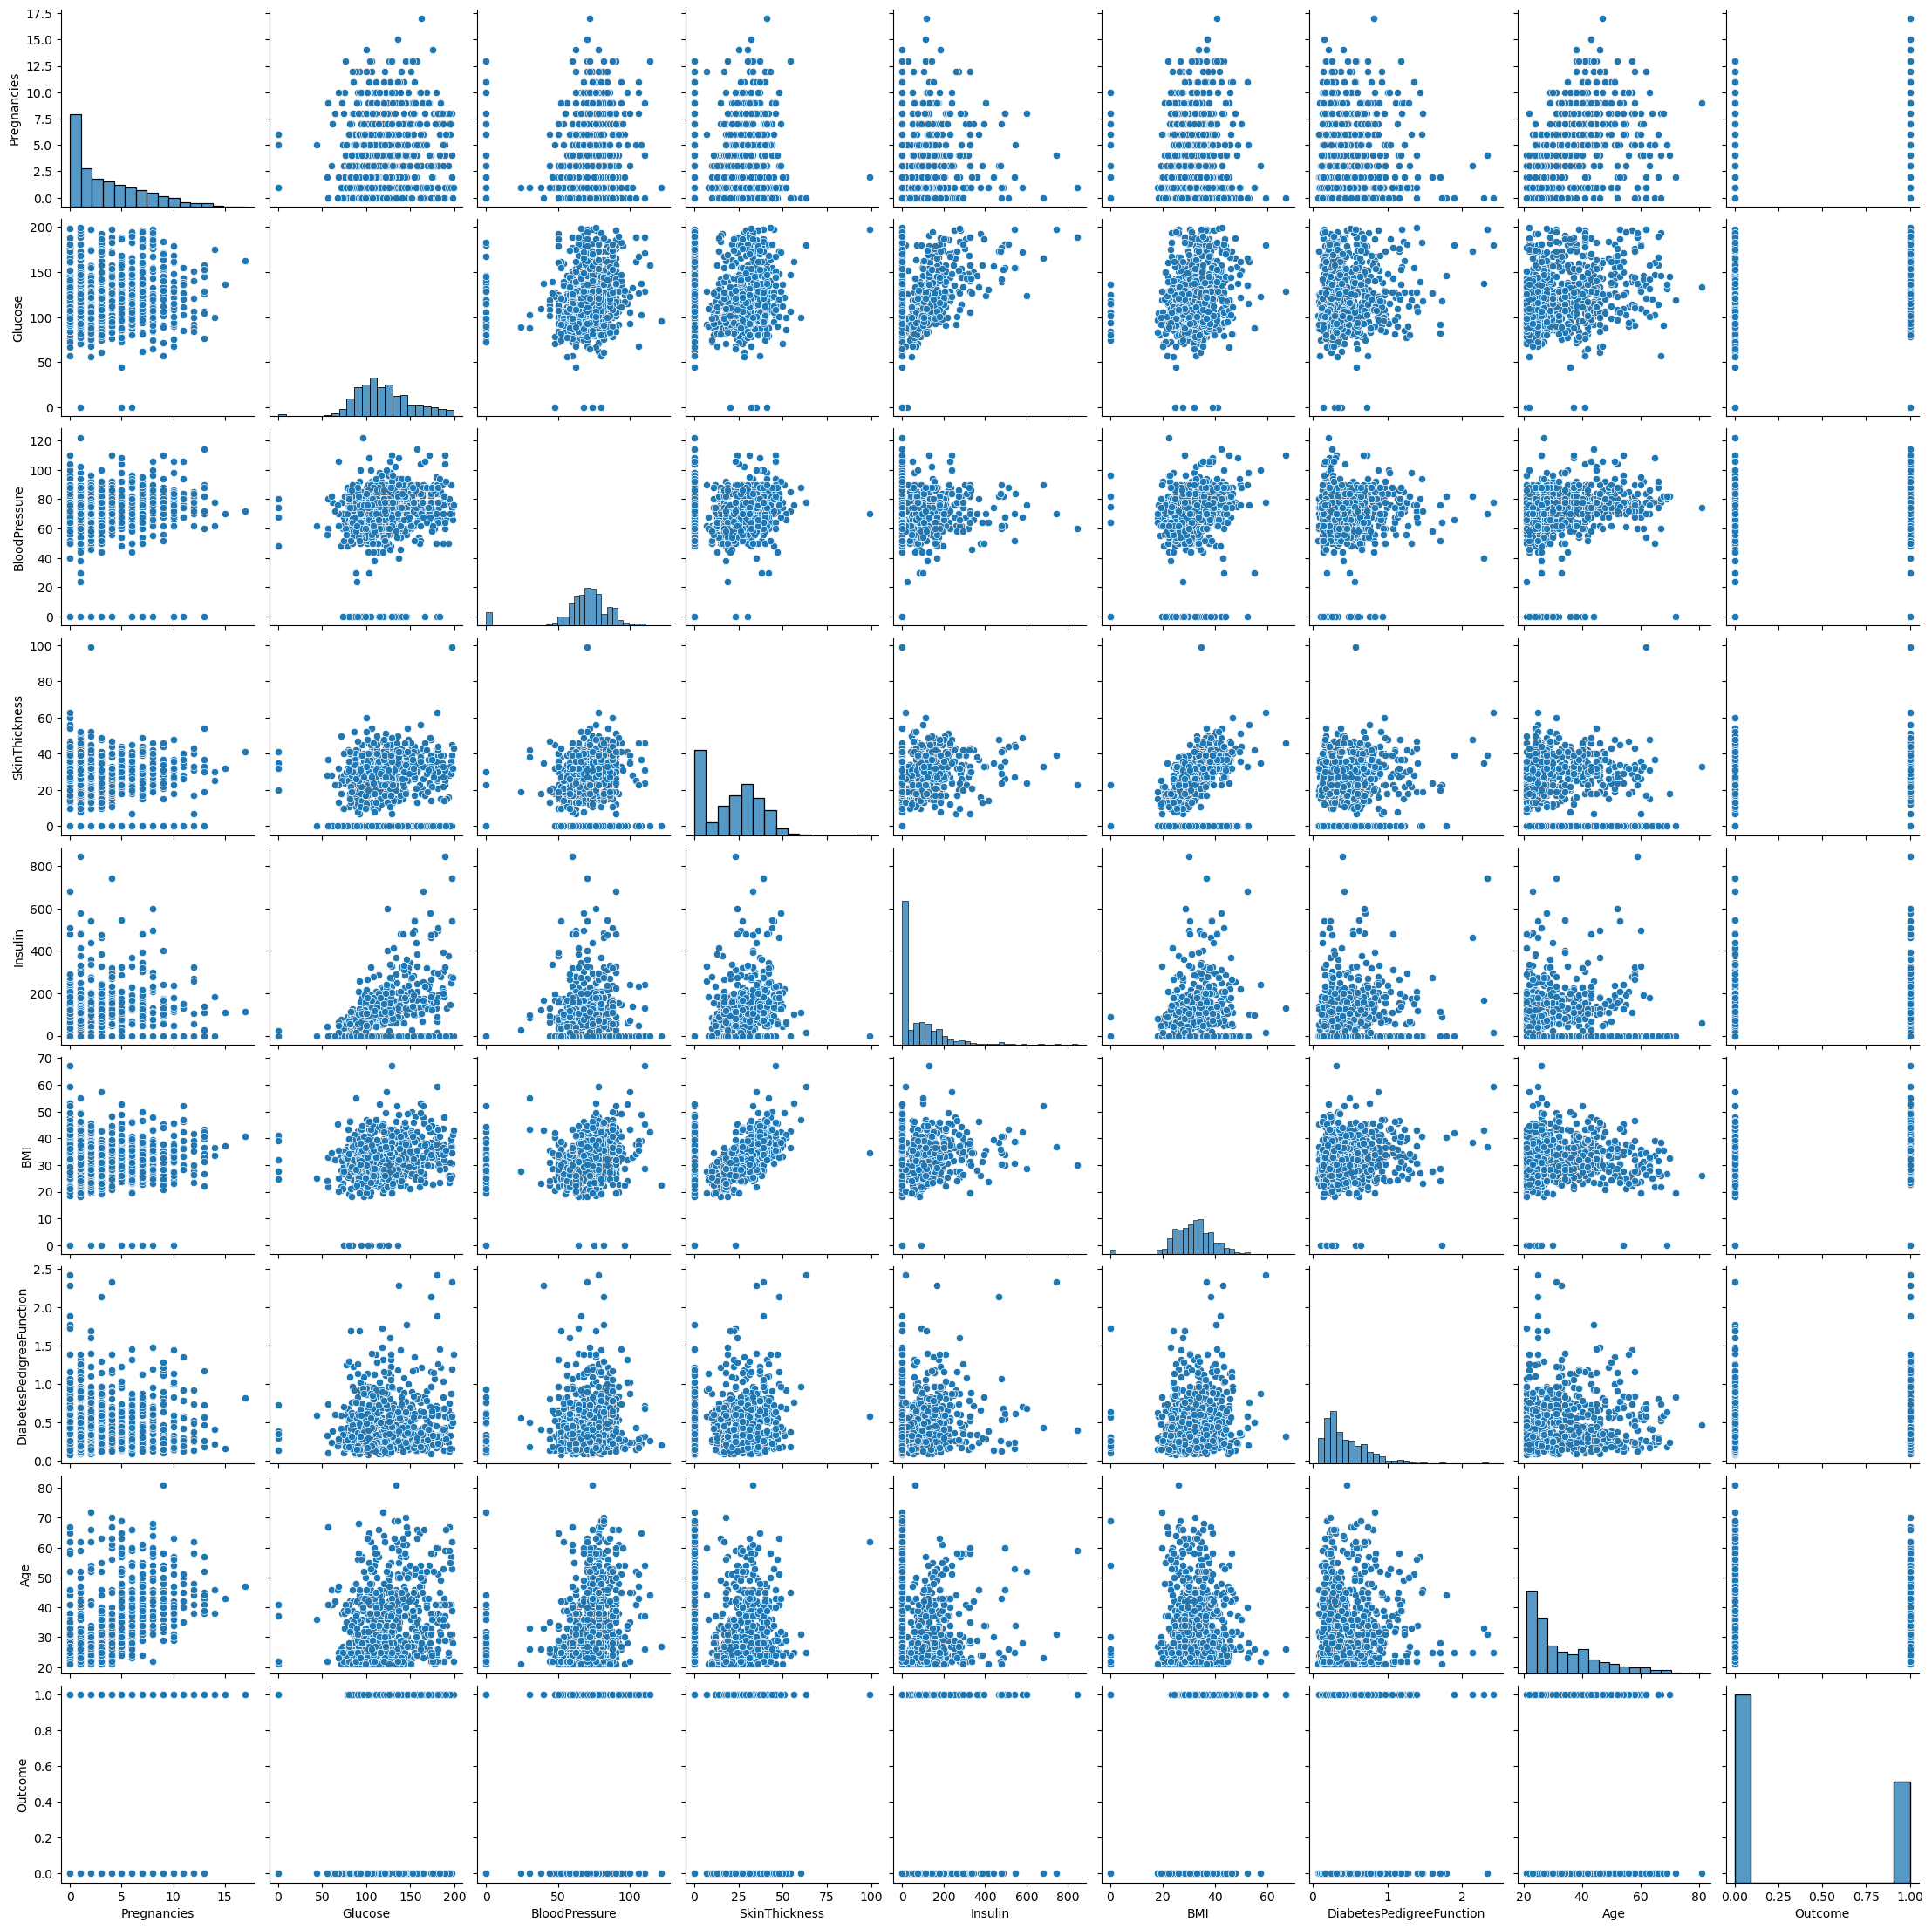

In [13]:
sns.pairplot(data)

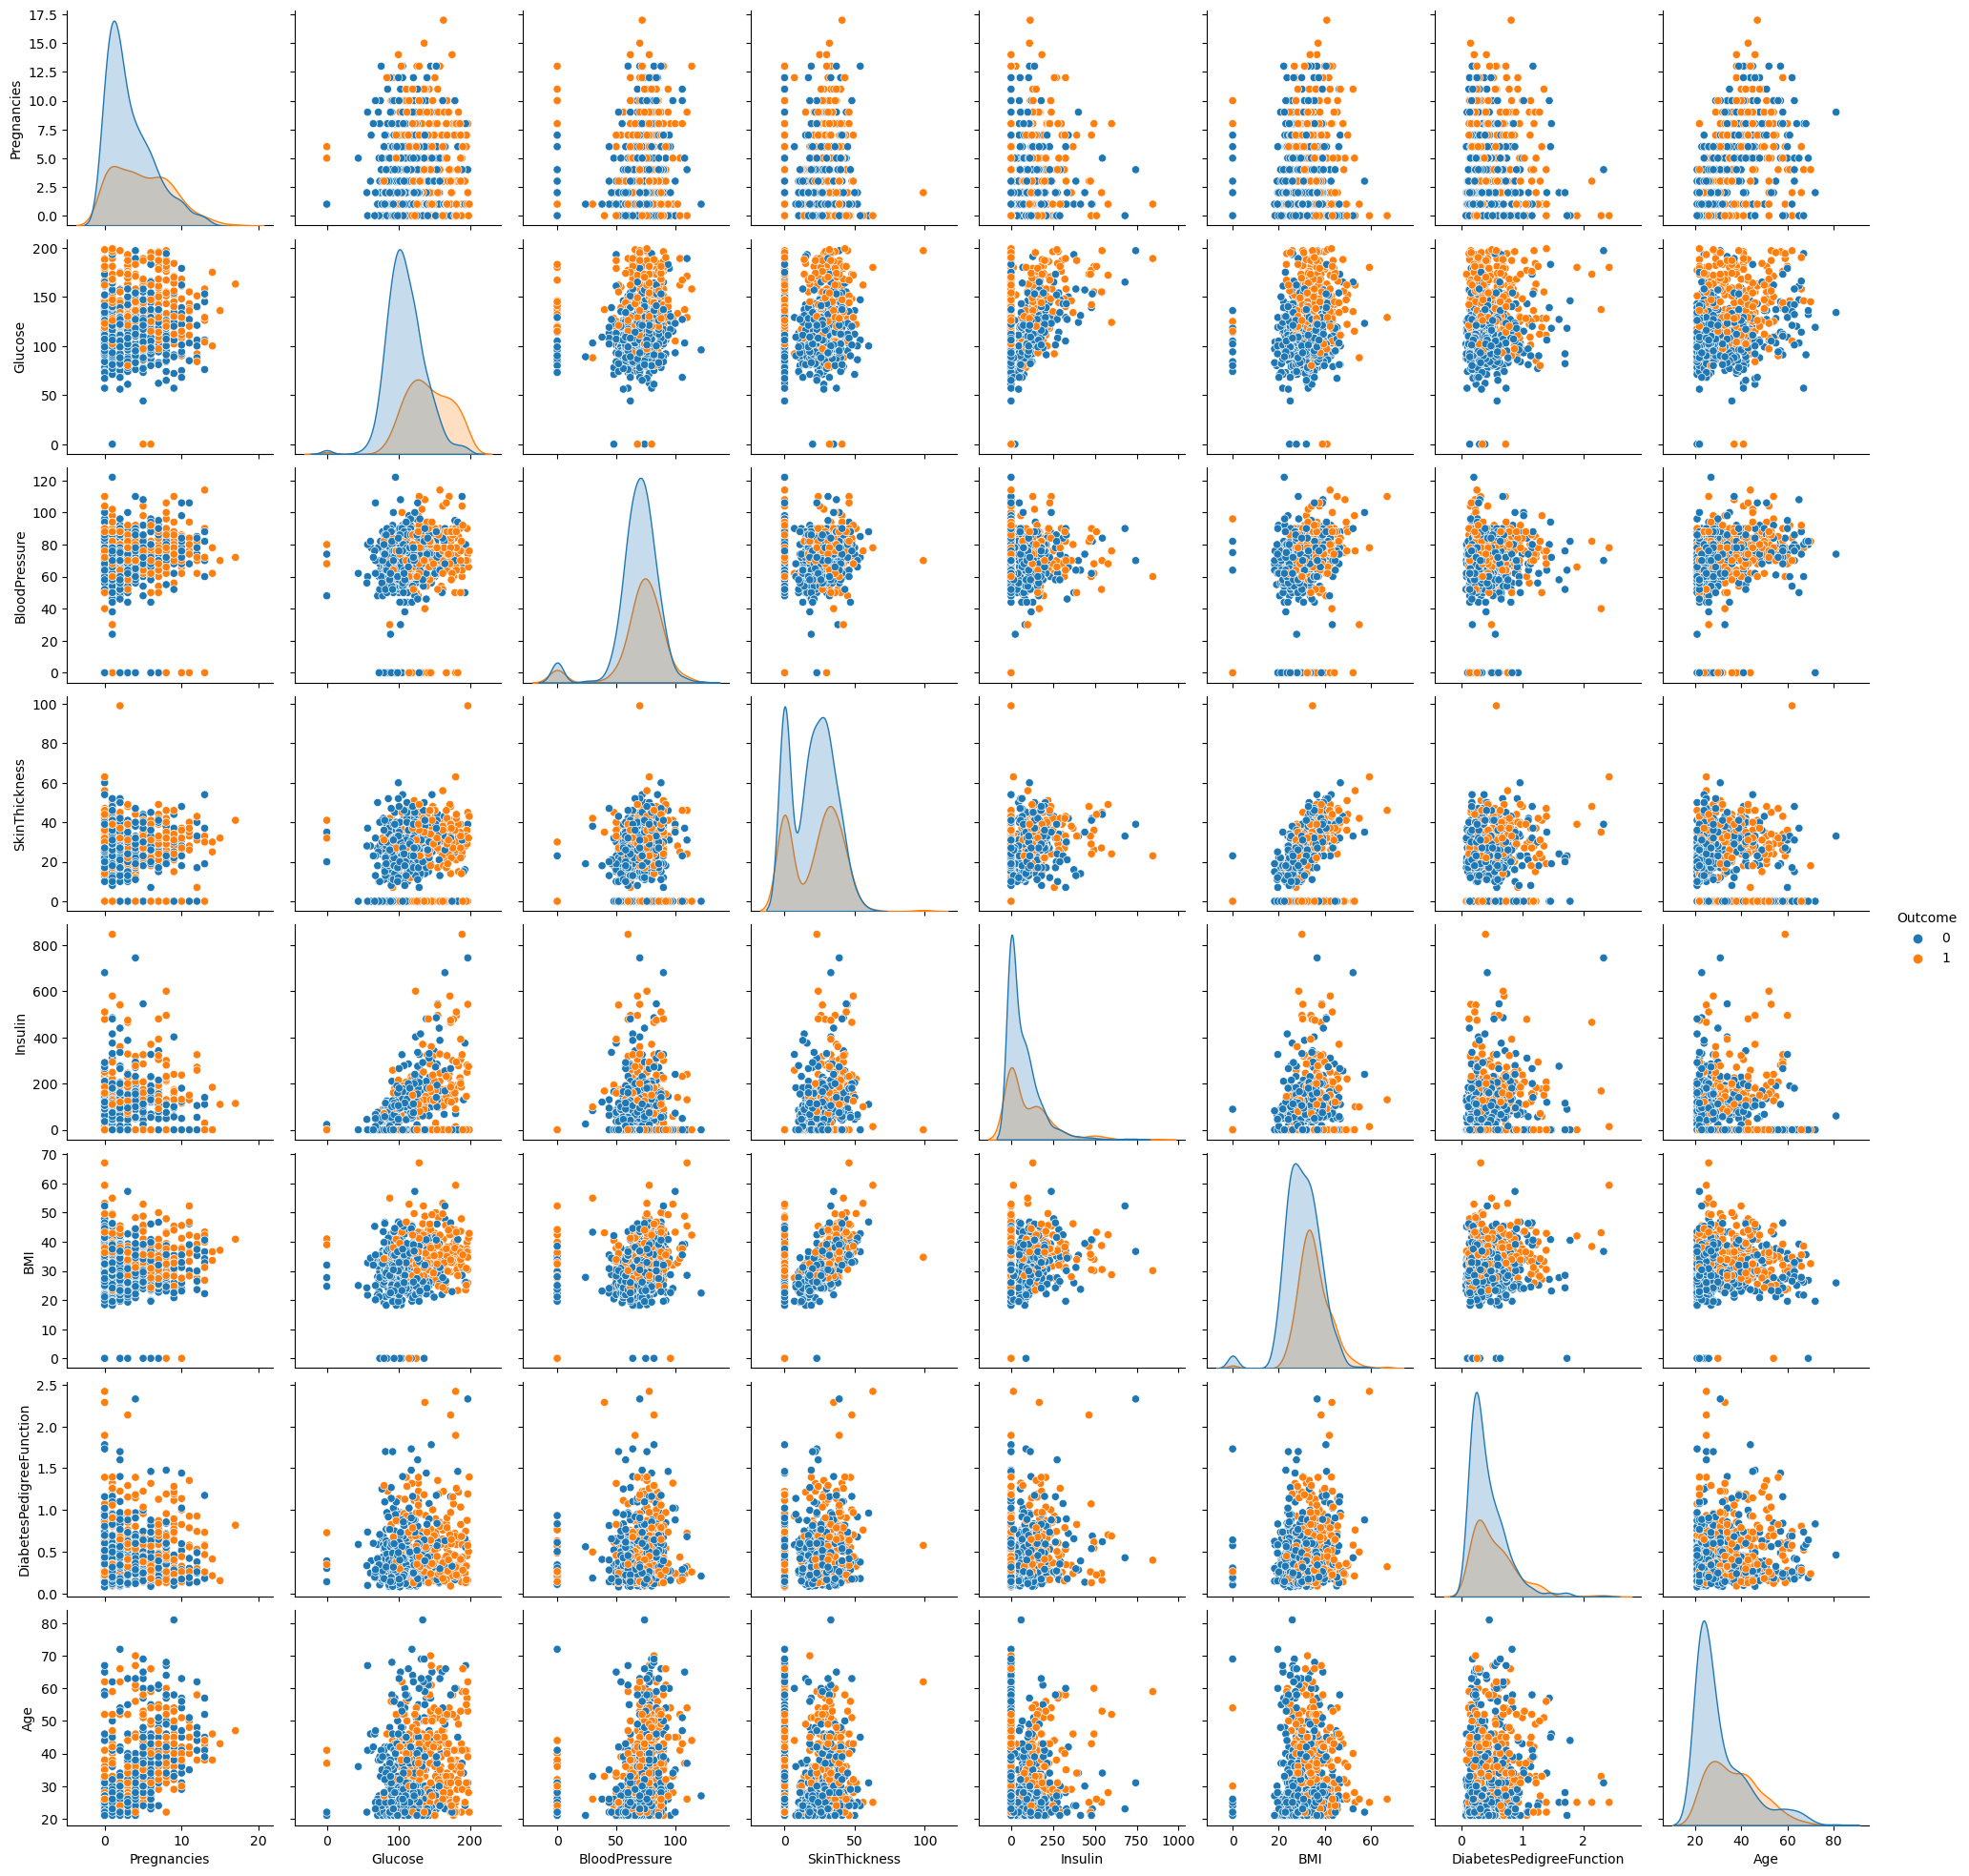

In [11]:
# Task A: How are the predictor variables related to the outcome variable?
sns.pairplot(data, hue="Outcome", diag_kind="kde")
plt.show()

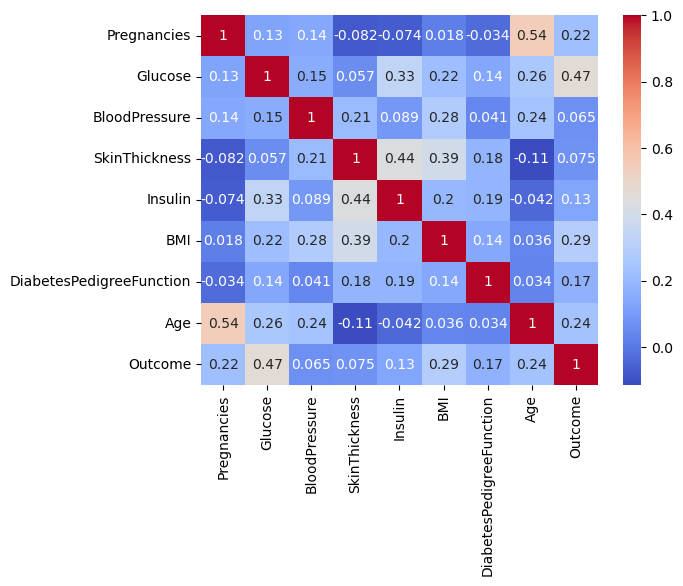

In [78]:
# Task B: What is the correlation between the predictor variables?
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

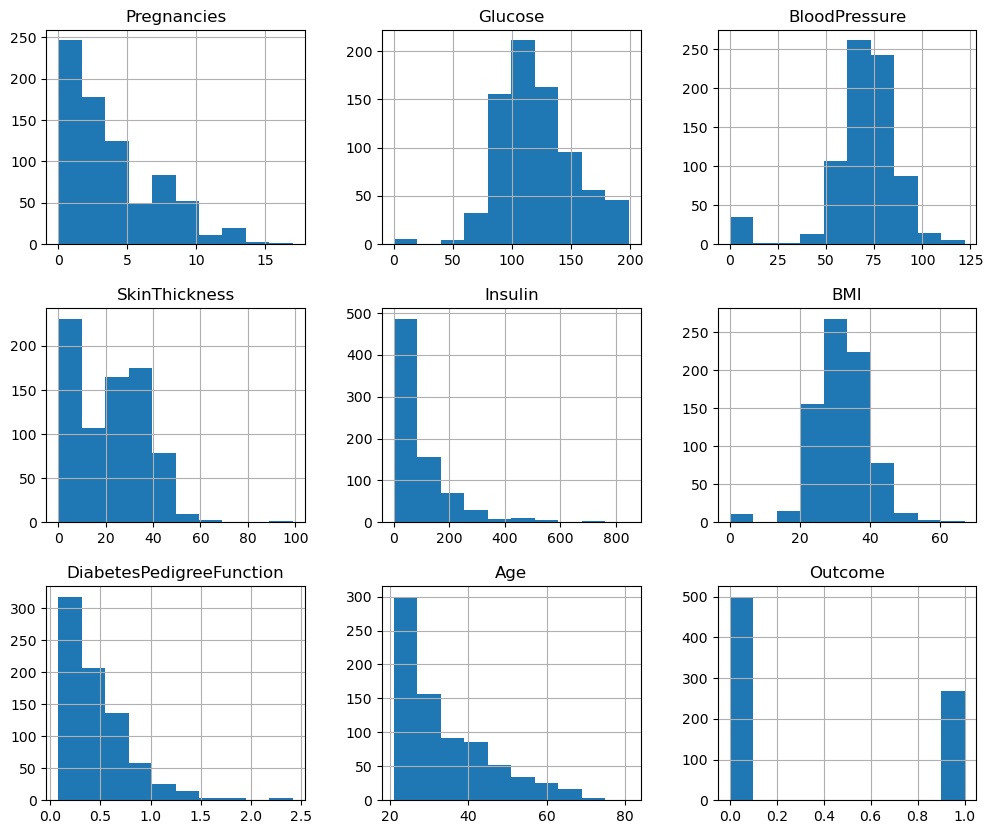

In [13]:
# Task C: What is the distribution of each predictor variable?
data.hist(figsize=(12, 10))
plt.show()

C:\Users\iykeo\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


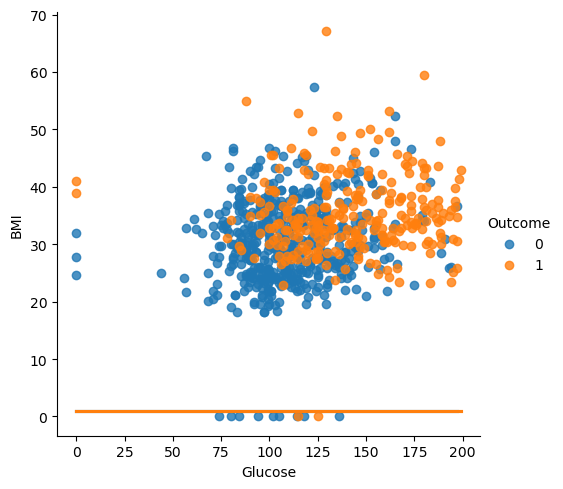

In [14]:
# Task D 1: Is there any interaction effect between the predictor variables?
sns.lmplot(x="Glucose", y="BMI", hue="Outcome", data=data, logistic=True)
plt.show()

C:\Users\iykeo\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


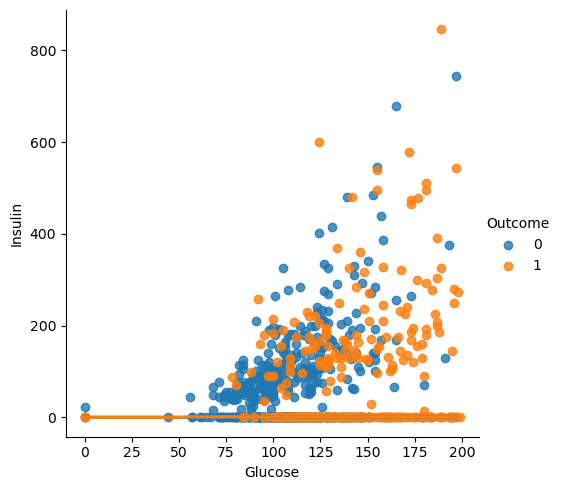

In [15]:
# Task D2: Is there any interaction effect between the predictor variables?
sns.lmplot(x="Glucose", y="Insulin", hue="Outcome", data=data, logistic=True)
plt.show()

C:\Users\iykeo\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


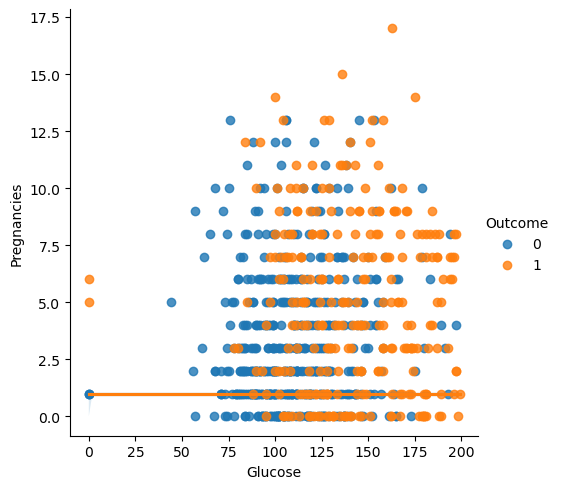

In [16]:
# Task D3: Is there any interaction effect between the predictor variables?
sns.lmplot(x="Glucose", y="Pregnancies", hue="Outcome", data=data, logistic=True)
plt.show()

C:\Users\iykeo\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


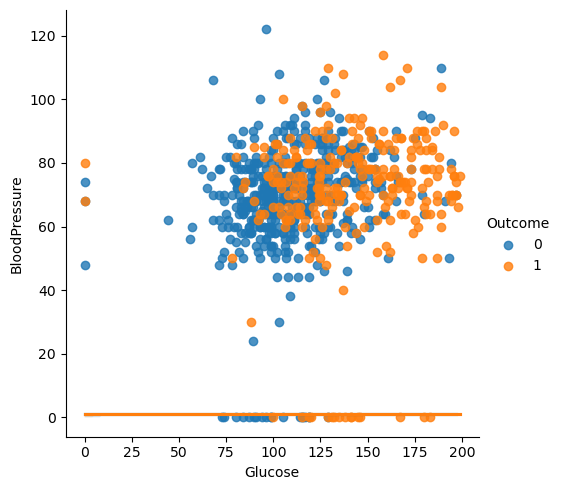

In [17]:
# Task D4: Is there any interaction effect between the predictor variables?
sns.lmplot(x="Glucose", y="BloodPressure", hue="Outcome", data=data, logistic=True)
plt.show()

C:\Users\iykeo\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


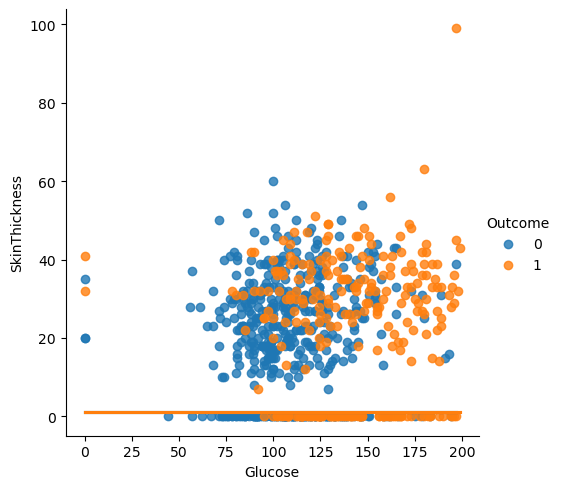

In [18]:
# Task D5: Is there any interaction effect between the predictor variables?
sns.lmplot(x="Glucose", y="SkinThickness", hue="Outcome", data=data, logistic=True)
plt.show()

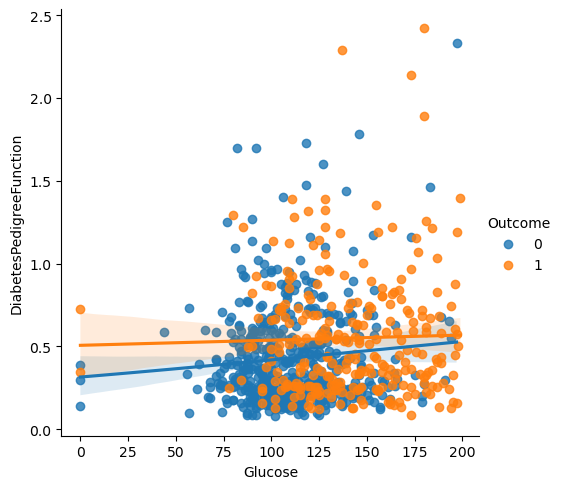

In [19]:
# Task D6: Is there any interaction effect between the predictor variables?
sns.lmplot(x="Glucose", y="DiabetesPedigreeFunction", hue="Outcome", data=data, logistic=True)
plt.show()

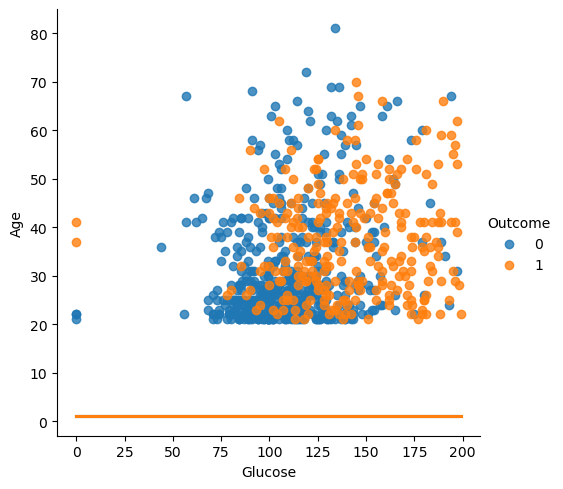

In [20]:
# Task D7: Is there any interaction effect between the predictor variables?
sns.lmplot(x="Glucose", y="Age", hue="Outcome", data=data, logistic=True)
plt.show()

In [21]:
# Task E: What is the average age of the individuals in the dataset?
average_age = data["Age"].mean()
print("Average Age:", average_age)

Average Age: 33.240885416666664


In [22]:
# Task F: What is the average glucose level for individuals with diabetes and without diabetes?
average_glucose_diabetes = data[data["Outcome"] == 1]["Glucose"].mean()
average_glucose_no_diabetes = data[data["Outcome"] == 0]["Glucose"].mean()
print("Average Glucose for Diabetes:", average_glucose_diabetes)
print("Average Glucose for No Diabetes:", average_glucose_no_diabetes)

Average Glucose for Diabetes: 141.25746268656715
Average Glucose for No Diabetes: 109.98


In [ ]:
# Task F: What is the average glucose level for individuals with diabetes and without diabetes?
average_glucose_diabetes = data[data["Outcome"] == 1]["Glucose"].mean()
average_glucose_no_diabetes = data[data["Outcome"] == 0]["Glucose"].mean()
print("Average Glucose for Diabetes:", average_glucose_diabetes)
print("Average Glucose for No Diabetes:", average_glucose_no_diabetes)

In [23]:
# Task G: What is the average BMI for individuals with diabetes and without diabetes?
average_bmi_diabetes = data[data["Outcome"] == 1]["BMI"].mean()
average_bmi_no_diabetes = data[data["Outcome"] == 0]["BMI"].mean()
print("Average BMI for Diabetes:", average_bmi_diabetes)
print("Average BMI for No Diabetes:", average_bmi_no_diabetes)

Average BMI for Diabetes: 35.14253731343284
Average BMI for No Diabetes: 30.3042


In [24]:
# Task G: What is the average BMI for individuals with diabetes and without diabetes?
average_bmi_diabetes = data[data["Outcome"] == 1]["BMI"].mean()
average_bmi_no_diabetes = data[data["Outcome"] == 0]["BMI"].mean()
print("Average BMI for Diabetes:", average_bmi_diabetes)
print("Average BMI for No Diabetes:", average_bmi_no_diabetes)

Average BMI for Diabetes: 35.14253731343284
Average BMI for No Diabetes: 30.3042


In [25]:
# Task H: What is the average BMI for individuals with diabetes and without diabetes?
average_Insulin_diabetes = data[data["Outcome"] == 1]["Insulin"].mean()
average_Insulin_no_diabetes = data[data["Outcome"] == 0]["Insulin"].mean()
print("Average Insulin for Diabetes:", average_Insulin_diabetes)
print("Average Insulin for No Diabetes:", average_Insulin_no_diabetes)

Average Insulin for Diabetes: 100.33582089552239
Average Insulin for No Diabetes: 68.792


In [26]:
# Task I: What is the average BMI for individuals with diabetes and without diabetes?
average_age_diabetes = data[data["Outcome"] == 1]["Age"].mean()
average_age_no_diabetes = data[data["Outcome"] == 0]["Age"].mean()
print("Average Age for Diabetes:", average_age_diabetes)
print("Average Age for No Diabetes:", average_age_no_diabetes)

Average Age for Diabetes: 37.06716417910448
Average Age for No Diabetes: 31.19


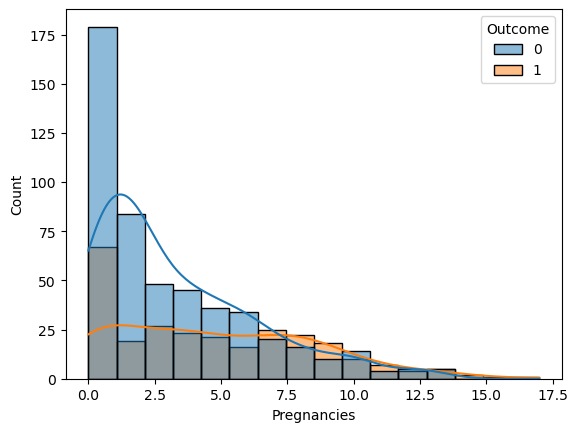

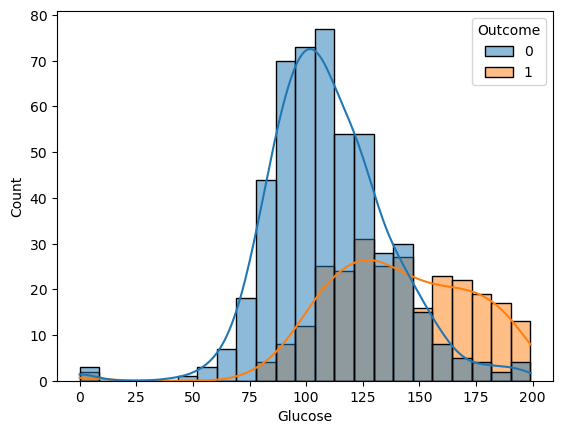

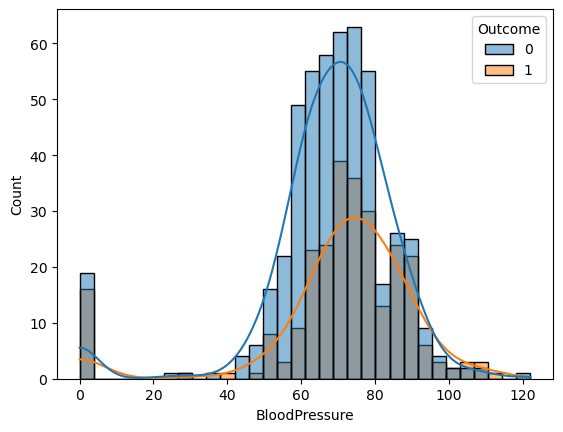

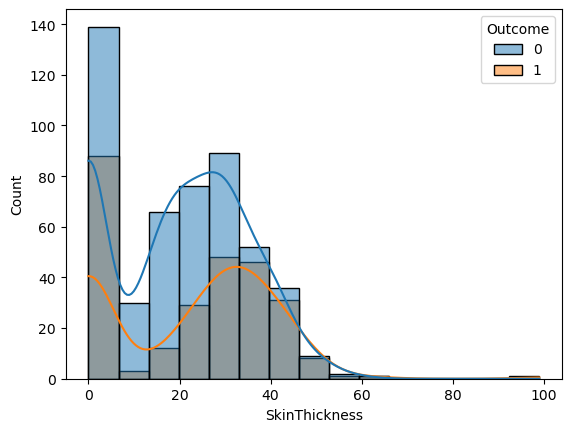

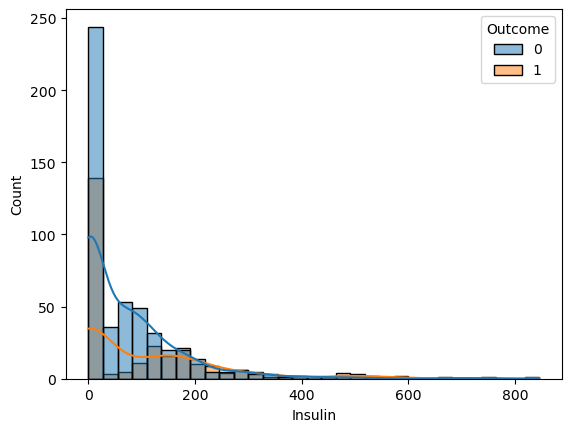

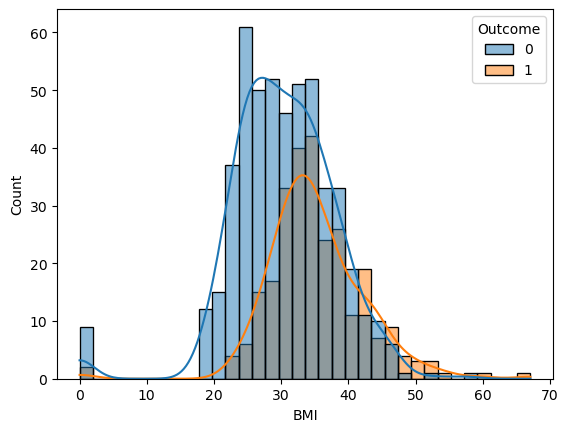

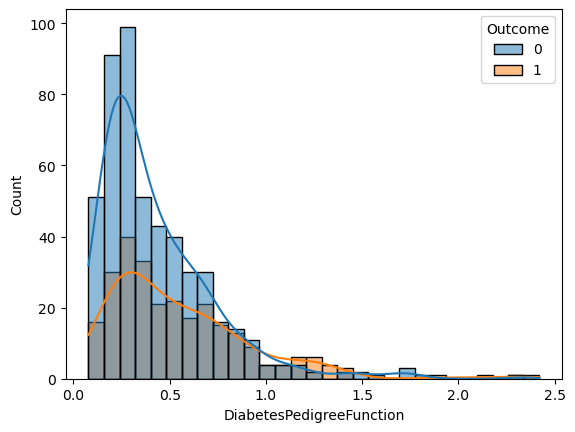

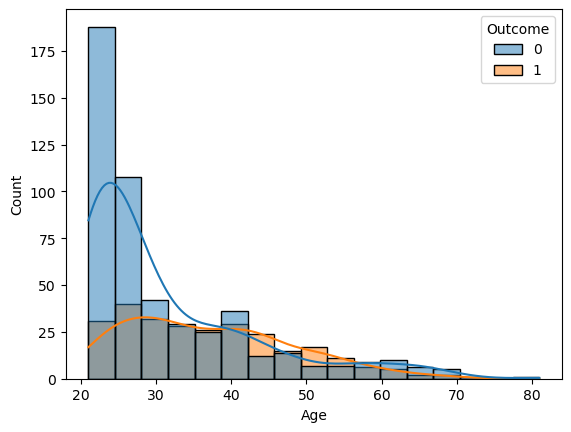

In [79]:
# Task J: How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
for col in data.columns[:-1]:
    sns.histplot(data, x=col, hue="Outcome", kde=True)
    plt.show()

Task K:Are there any outliers in the predictor variables?

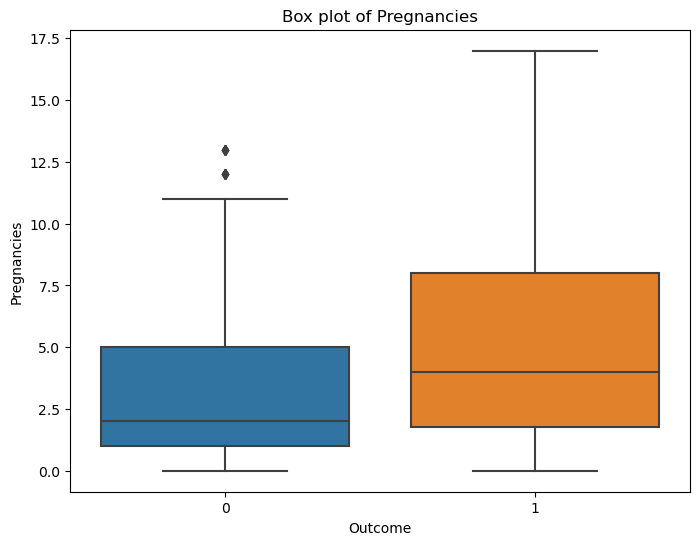

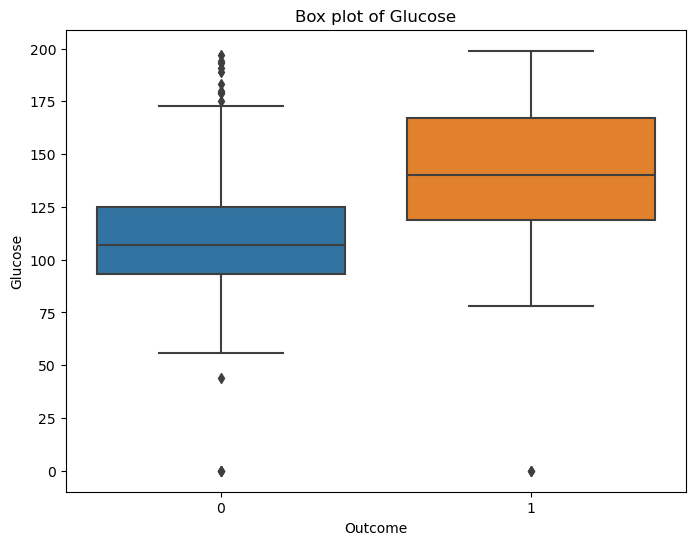

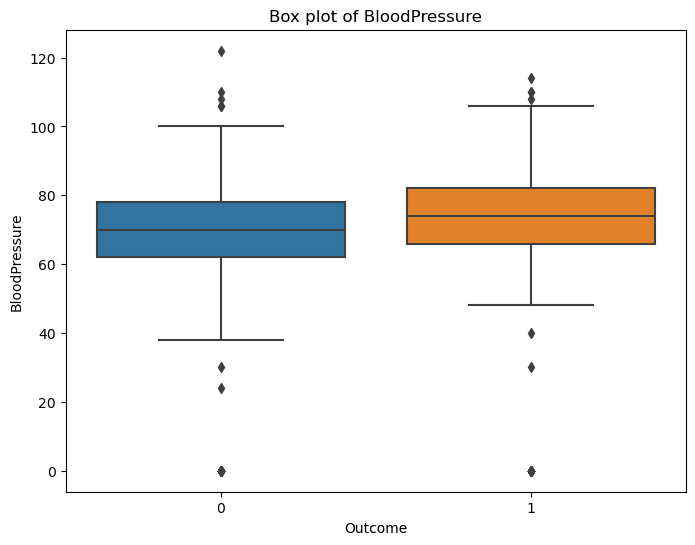

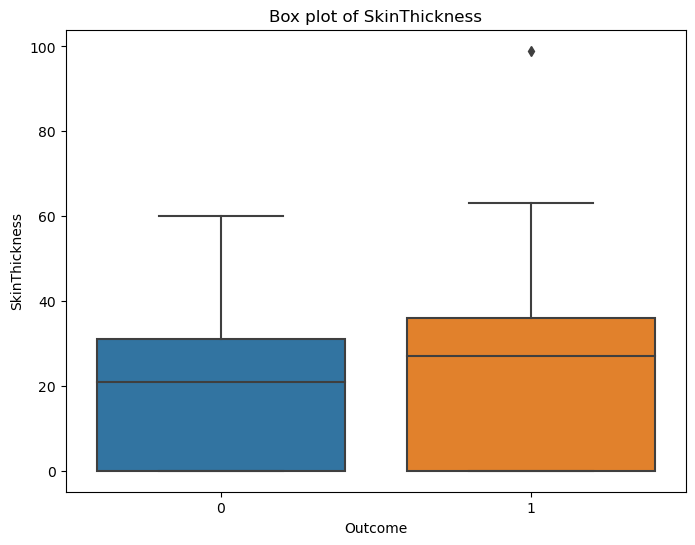

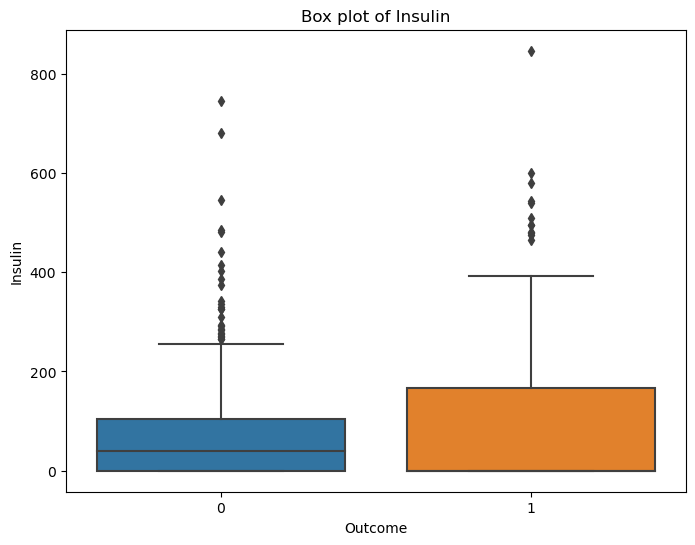

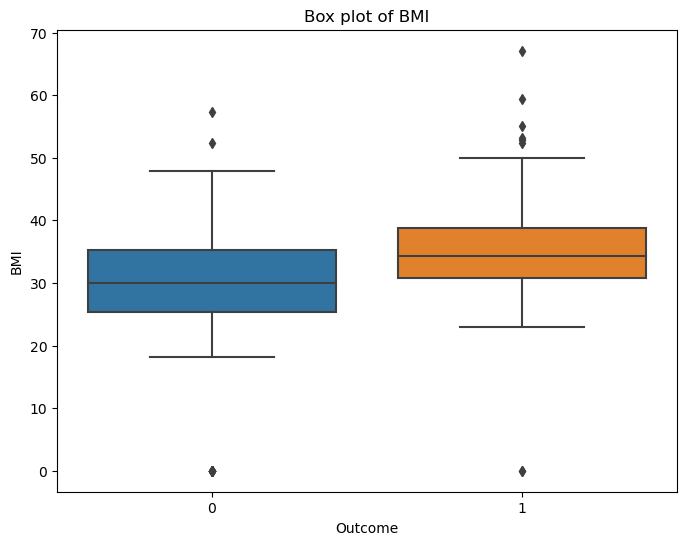

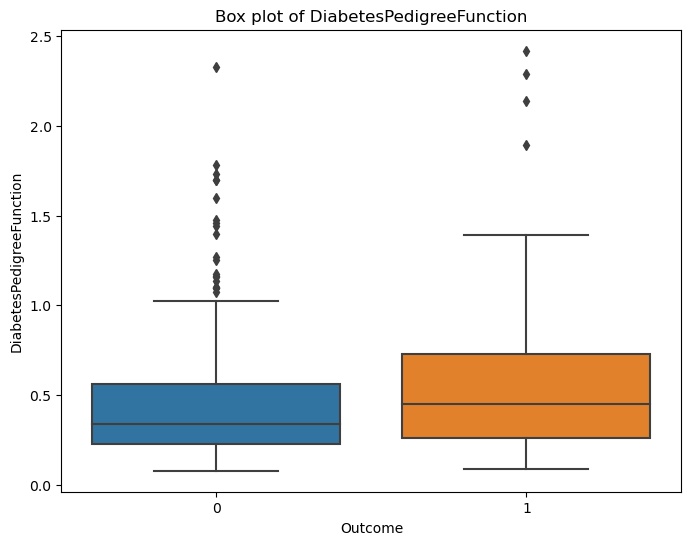

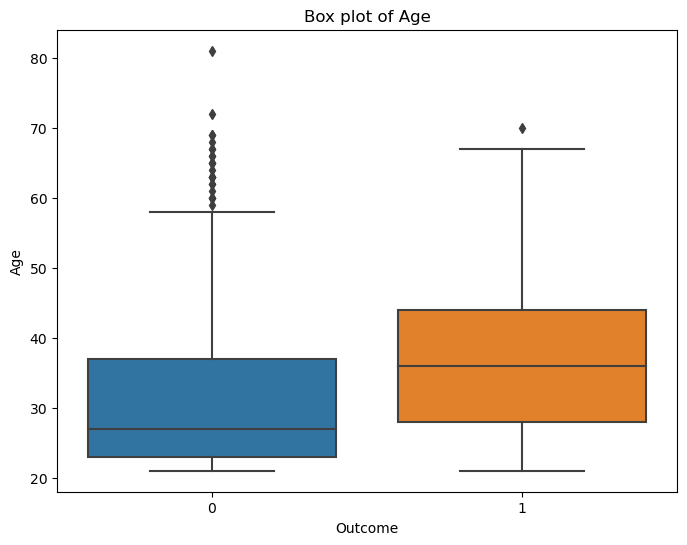

In [80]:
# Adjust the column names as per your dataset.
predictor_columns = data.columns[:-1]

# Visualize outliers using box plots for each predictor variable
for col in predictor_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="Outcome", y=col, data=data)
    plt.title(f"Box plot of {col}")
    plt.show()


Handling outliers: I believe the outliers are due to missing values imputed as 0s and by dealing with these missing values the outliers can be taken care of.

PART II: Processing and Feature Engineering

Task 1: Handling Outliers - To be taken care of

Task 2: Handling Null Values:

In [81]:
# Check for missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [82]:
#I believe some of the null values are coded considering 0s in parameters like Insluin and Skin Thickness
data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [83]:
(data['Insulin']==0).sum() #check how  many zeros there are in each column

for column_name in data.columns:
    count = (data[column_name] == 0).sum()
    print('Num zeros in column', column_name, 'is:', count)

Num zeros in column Pregnancies is: 111
Num zeros in column Glucose is: 5
Num zeros in column BloodPressure is: 35
Num zeros in column SkinThickness is: 227
Num zeros in column Insulin is: 374
Num zeros in column BMI is: 11
Num zeros in column DiabetesPedigreeFunction is: 0
Num zeros in column Age is: 0
Num zeros in column Outcome is: 500


In [84]:
#Changing the zeros to Nan to represent actual null values except for pregnancy which can have value 0
cols_missing_vals = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] # cols with inappropriate 0s
data[cols_missing_vals] = data[cols_missing_vals].replace(0, np.NaN) # replace 0's with NaNs
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Null values: Dropping Missing Values for parameters with few rows of Null values (Glucose, BMI, and Blood pressure)

In [85]:
#Printing the data shape before and after dropping Null values
print("Shape before dropping NAs", data.shape)

data = data.dropna(subset=['Glucose', 'BMI', 'BloodPressure']) 

print("Shape after dropping NAs for Glucose, BMI, and BloodPressure columns", data.shape)

Shape before dropping NAs (768, 9)
Shape after dropping NAs for Glucose, BMI, and BloodPressure columns (724, 9)


In [86]:
data.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                     332
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Using average imputation to replace Null values in Insulin and Skinthickness

In [87]:
# Fill missing values with the mean of their respective columns
data.fillna(data.mean(), inplace=True)

In [88]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
data.shape

(724, 9)

In [31]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   724.000000  724.000000     724.000000     724.000000  724.000000   
mean      3.866022  121.882597      72.400552      29.182331  156.056122   
std       3.362803   30.750030      12.379870       9.018907   87.395294   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  118.250000   
50%       3.000000  117.000000      72.000000      29.182331  156.056122   
75%       6.000000  142.000000      80.000000      33.000000  156.056122   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  724.000000                724.000000  724.000000  724.000000  
mean    32.467127                  0.474765   33.350829    0.343923  
std      6.888941                  0.332315   11.765393    0.475344  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.245000   24.000000    0.000000  
50%     32.400000                  0.379000   29.000000    0.000000  
75%     36.600000                  0.627500   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Making a copy of the new dataframe

In [32]:
# Make a copy of the DataFrame
df = data.copy()

Saving the new file in csv

In [33]:
# data to a CSV file to study the data in csv/excel
data.to_csv('data.csv', index=False)

TASK 3: Scaling and normalization: I opted not to scale because the units are are all obtainable in real world situation

TASK 4: Handling imbalanced data

In [34]:
data.groupby('Outcome').count()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Outcome                                                                     
0                475      475            475            475      475  475   
1                249      249            249            249      249  249   

         DiabetesPedigreeFunction  Age  
Outcome                                 
0                             475  475  
1                             249  249

As the number of samples for Class 0 is significantly higher than Class 1, the dataset is imbalanced. In such cases, it is generally recommended to handle imbalance to avoid biased model performance.

In [37]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = data[predictor_columns]
y = data["Outcome"]

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples of the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Update the dataset with the resampled data
data = pd.concat([X_resampled, y_resampled], axis=1)


In [38]:
data.groupby('Outcome').count()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Outcome                                                                     
0                475      475            475            475      475  475   
1                475      475            475            475      475  475   

         DiabetesPedigreeFunction  Age  
Outcome                                 
0                             475  475  
1                             475  475

PART III: Training ML models

Task 1: Splitting the dataset

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming the 'data' variable contains the preprocessed dataset after handling null values and outliers.
# Separate features and target variable
X = data[predictor_columns]
y = data["Outcome"]

# Split the data into a training set and a testing set (80% training, 20% testing) with the random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888)


Task 2: Train the models(Logistics Regression & Random Forest) and evaluate their performance

In [40]:
# Initialize the models with the random seed
logistic_model = LogisticRegression(max_iter=1000, random_state=888)
random_forest_model = RandomForestClassifier(random_state=888)

In [42]:
# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(random_forest_model, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Get the best Random Forest model after tuning
random_forest_model_tuned = grid_search_rf.best_estimator_

# Train the tuned models on the training set
logistic_model.fit(X_train, y_train)
random_forest_model_tuned.fit(X_train, y_train)

RandomForestClassifier(random_state=888)

In [43]:
# Make predictions on the training set
logistic_train_predictions = logistic_model.predict(X_train)
random_forest_train_predictions = random_forest_model.predict(X_train)

In [44]:
# Make predictions on the testing set
logistic_test_predictions = logistic_model.predict(X_test)
random_forest_test_predictions = random_forest_model_tuned.predict(X_test)


In [46]:
# Define the evaluate_model function
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, roc_auc

In [50]:
# Evaluate the models on the testing set
logistic_accuracy, logistic_precision, logistic_recall, logistic_f1, logistic_roc_auc = evaluate_model(y_test, logistic_test_predictions)
random_forest_accuracy, random_forest_precision, random_forest_recall, random_forest_f1, random_forest_roc_auc = evaluate_model(y_test, random_forest_test_predictions)


In [52]:

# Evaluate the models on the training set
logistic_train_accuracy, logistic_train_precision, logistic_train_recall, logistic_train_f1, logistic_train_roc_auc = evaluate_model(y_train, logistic_train_predictions)
random_forest_train_accuracy, random_forest_train_precision, random_forest_train_recall, random_forest_train_f1, random_forest_train_roc_auc = evaluate_model(y_train, random_forest_train_predictions)


In [55]:
# Print the evaluation metrics for the testing set
print("Logistic Regression Testing Set Metrics:")
print("Accuracy:", logistic_accuracy)
print("Precision:", logistic_precision)
print("Recall:", logistic_recall)
print("F1 Score:", logistic_f1)
print("ROC AUC:", logistic_roc_auc)

print("\nRandom Forest Testing Set Metrics:")
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1 Score:", random_forest_f1)
print("ROC AUC:", random_forest_roc_auc)


Logistic Regression Testing Set Metrics:
Accuracy: 0.7052631578947368
Precision: 0.7346938775510204
Recall: 0.7058823529411765
F1 Score: 0.7200000000000001
ROC AUC: 0.7052139037433156

Random Forest Testing Set Metrics:
Accuracy: 0.8052631578947368
Precision: 0.8095238095238095
Recall: 0.8333333333333334
F1 Score: 0.8212560386473431
ROC AUC: 0.8030303030303031


In [56]:
# Print the evaluation metrics for the training set
print("Logistic Regression Training Set Metrics:")
print("Accuracy:", logistic_train_accuracy)
print("Precision:", logistic_train_precision)
print("Recall:", logistic_train_recall)
print("F1 Score:", logistic_train_f1)
print("ROC AUC:", logistic_train_roc_auc)

print("\nRandom Forest Training Set Metrics:")
print("Accuracy:", random_forest_train_accuracy)
print("Precision:", random_forest_train_precision)
print("Recall:", random_forest_train_recall)
print("F1 Score:", random_forest_train_f1)
print("ROC AUC:", random_forest_train_roc_auc)

Logistic Regression Training Set Metrics:
Accuracy: 0.7723684210526316
Precision: 0.7808988764044944
Recall: 0.7453083109919572
F1 Score: 0.7626886145404664
ROC AUC: 0.771878961697529

Random Forest Training Set Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0


In [57]:
# Compare training and testing accuracies
print("Logistic Regression:")
print("Training Accuracy:", logistic_train_accuracy)
print("Accuracy:", logistic_accuracy)

print("\nRandom Forest:")
print("Training Accuracy:", random_forest_train_accuracy)
print("Accuracy:", random_forest_accuracy)


Logistic Regression:
Training Accuracy: 0.7723684210526316
Accuracy: 0.7052631578947368

Random Forest:
Training Accuracy: 1.0
Accuracy: 0.8052631578947368


In [58]:
# Get probabilities for ROC curve and Precision-Recall curve
logistic_probs = logistic_model.predict_proba(X_test)[:, 1]
random_forest_probs = random_forest_model.predict_proba(X_test)[:, 1]

In [59]:
# ROC curve
logistic_fpr, logistic_tpr, logistic_thresholds = roc_curve(y_test, logistic_probs)
random_forest_fpr, random_forest_tpr, random_forest_thresholds = roc_curve(y_test, random_forest_probs)

In [60]:
# Precision-Recall curve
logistic_precision, logistic_recall, logistic_thresholds_pr = precision_recall_curve(y_test, logistic_probs)
random_forest_precision, random_forest_recall, random_forest_thresholds_pr = precision_recall_curve(y_test, random_forest_probs)


In [61]:
# Area under the curve (AUC) for ROC and Precision-Recall curves
logistic_auc = auc(logistic_fpr, logistic_tpr)
random_forest_auc = auc(random_forest_fpr, random_forest_tpr)

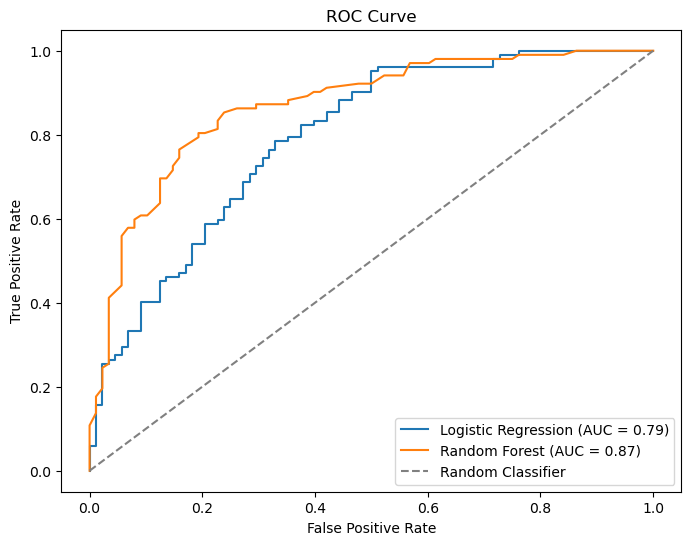

In [62]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr, logistic_tpr, label=f"Logistic Regression (AUC = {logistic_auc:.2f})")
plt.plot(random_forest_fpr, random_forest_tpr, label=f"Random Forest (AUC = {random_forest_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

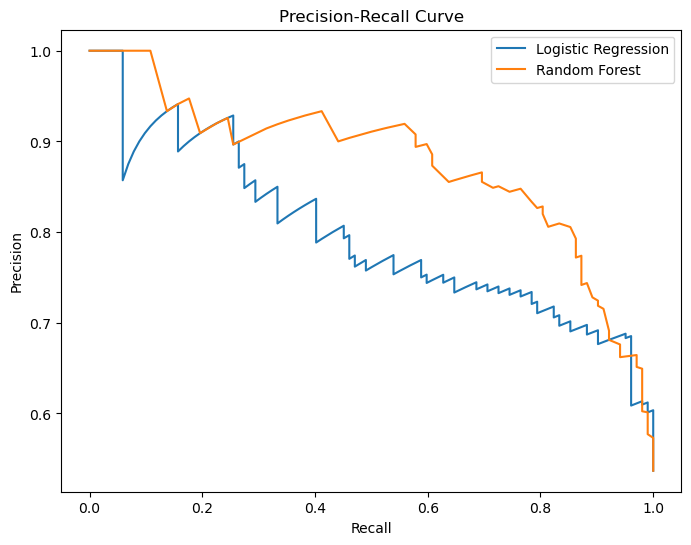

In [63]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(logistic_recall, logistic_precision, label=f"Logistic Regression")
plt.plot(random_forest_recall, random_forest_precision, label=f"Random Forest")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()